<a href="https://colab.research.google.com/github/Kushanyasiru97/Research_Algorithms/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Nov 16 05:45:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/WasteImages/Train'
valid_path = '/content/drive/MyDrive/WasteImages/Test'

In [6]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/WasteImages/Train/*')

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/WasteImages/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2568 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/WasteImages/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 786 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
161/161 [==============================] - 641s 4s/step - loss: 1.5533 - accuracy: 0.8579 - val_loss: 0.7384 - val_accuracy: 0.9326
Epoch 2/10
161/161 [==============================] - 45s 279ms/step - loss: 1.0609 - accuracy: 0.9023 - val_loss: 1.4838 - val_accuracy: 0.8893
Epoch 3/10
161/161 [==============================] - 44s 274ms/step - loss: 0.7857 - accuracy: 0.9330 - val_loss: 1.0166 - val_accuracy: 0.9211
Epoch 4/10
161/161 [==============================] - 43s 268ms/step - loss: 0.5849 - accuracy: 0.9494 - val_loss: 1.2547 - val_accuracy: 0.9173
Epoch 5/10
161/161 [==============================] - 44s 270ms/step - loss: 0.5587 - accuracy: 0.9533 - val_loss: 0.9546 - val_accuracy: 0.9466
Epoch 6/10
161/161 [==============================] - 46s 287ms/step - loss: 0.4202 - accuracy: 0.9685 - val_loss: 1.6108 - val_accuracy: 0.9186
Epoch 7/10
161/161 [==============================] - 43s 267ms/step - loss: 0.4297 - accuracy: 0.9665 - val_loss: 1.2870 - val_accu

In [17]:
import matplotlib.pyplot as plt

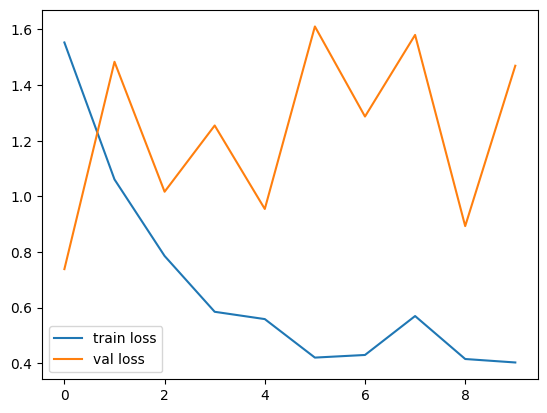

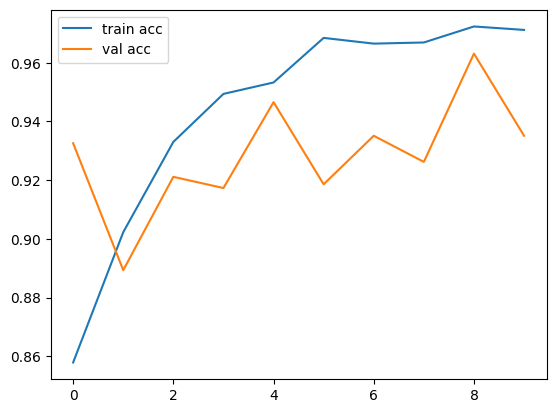

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
y_pred = model.predict(test_set)

50/50 [==============================] - 4s 48ms/step


In [21]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [8.1277723e-31, 1.0000000e+00, 0.0000000e+00, 7.8244072e-36],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0906968e-26, 1.4057233e-25, 1.1106341e-22],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([3, 1, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 0, 3, 1, 1, 0, 0, 3, 0, 0,
       0, 0, 3, 3, 3, 0, 3, 0, 0, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 3, 3, 0,
       3, 0, 1, 1, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 1, 3, 1, 0, 1, 0, 3,
       0, 1, 0, 1, 3, 0, 3, 1, 0, 3, 1, 3, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 1, 3, 0, 0, 0, 0, 0, 3, 1, 1, 0, 3, 1, 3, 0, 3, 0, 1, 1, 3, 3,
       3, 3, 0, 0, 0, 3, 1, 1, 3, 1, 3, 3, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 3, 1, 0, 3, 1, 3, 3, 0, 0, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 3,
       0, 0, 0, 0, 1, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 3, 3, 0, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 3, 1, 1, 0,
       1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 1, 3, 3, 0,
       1, 3, 0, 1, 0, 0, 1, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 1, 0, 3, 3,
       3, 3, 3, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 3, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0, 1, 0, 1, 3, 3, 0, 0,
       0, 3, 3, 0, 3, 2, 0, 0, 0, 3, 1, 1, 3, 0, 0,

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_inception.h5')

In [27]:
img_data

NameError: ignored

In [30]:
img=image.load_img('/content/drive/MyDrive/WasteImages/Test/Biological/biological697.jpg',target_size=(224,224))

In [31]:
x=image.img_to_array(img)
x

array([[[248., 249., 254.],
        [246., 247., 252.],
        [242., 243., 247.],
        ...,
        [117.,   8.,   5.],
        [117.,   8.,   3.],
        [113.,   4.,   0.]],

       [[243., 244., 249.],
        [243., 244., 249.],
        [243., 244., 248.],
        ...,
        [117.,   8.,   5.],
        [116.,   8.,   5.],
        [112.,   4.,   1.]],

       [[238., 239., 244.],
        [241., 242., 247.],
        [244., 245., 249.],
        ...,
        [114.,   6.,   4.],
        [113.,   7.,   7.],
        [108.,   4.,   3.]],

       ...,

       [[110., 106., 103.],
        [112., 108., 105.],
        [104., 100.,  97.],
        ...,
        [118., 106., 106.],
        [126., 115., 113.],
        [132., 122., 120.]],

       [[105., 100.,  97.],
        [110., 107., 102.],
        [102.,  97.,  94.],
        ...,
        [133., 121., 121.],
        [135., 124., 122.],
        [116., 106., 104.]],

       [[120., 112., 109.],
        [121., 116., 110.],
        [119., 1

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[7.9675461e-05, 9.2663214e-08, 9.9990427e-01, 1.6000557e-05]],
      dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 26ms/step


In [37]:
a==1

array([False])